In [2]:
import sys
sys.path.append('C:/Users/lisah/Documents/Repos/ma-code')
from src.plots_ll_fish import *

# Fisher

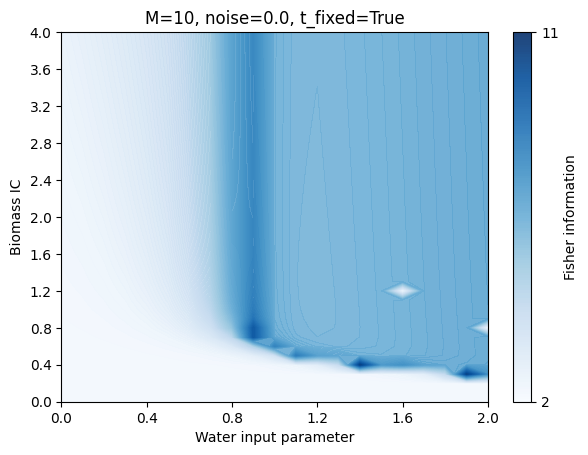

In [7]:
# Plots of the Fisher information of inferred a,m parameters
M_vals = [10]
noise_vals = [0.0]
w0=0.95
m=0.45
store=False
t_fixed=True
log=True

path_to_read= "C:/Users/lisah/Documents/Repos/ma-code/data/t_fixed/t50/fisher_am/"
path_to_store=""

make_all_fish_plots(M_vals, noise_vals,w0, m, path_to_read,path_to_store, t_fixed, store, log)

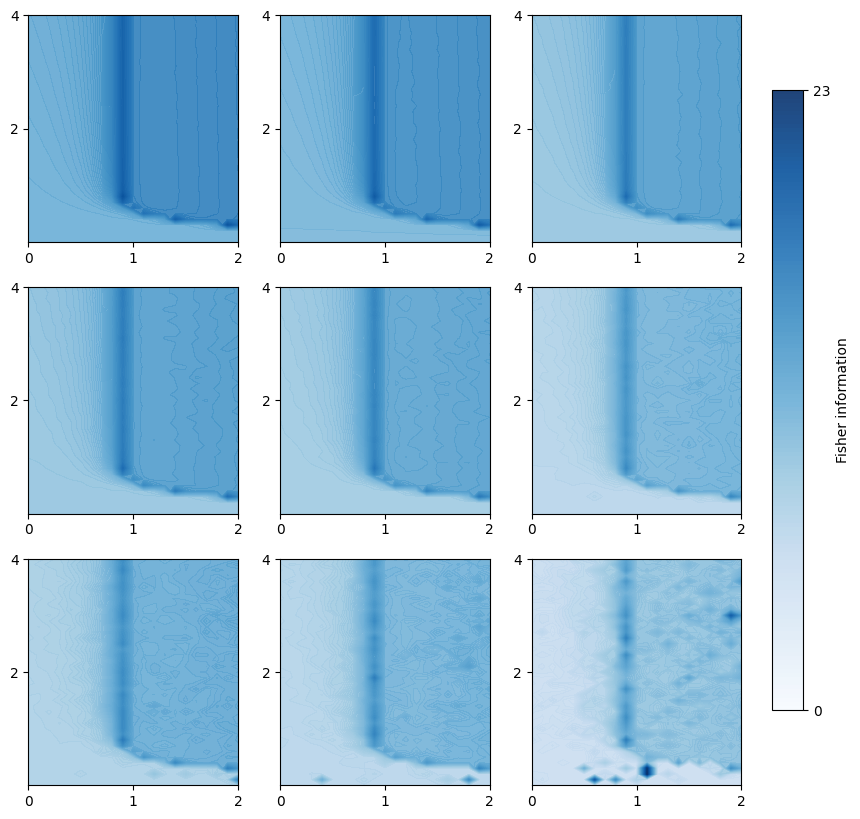

In [20]:
M_vals = [1000, 500, 100]
noise_vals = [0.01, 0.1, 0.5]
w0=0.95
m=0.45
store=False
t_fixed=True
log=True

path_to_read= "C:/Users/lisah/Documents/Repos/ma-code/data/t_fixed/t100/fisher_am/"
fish_grid_plot(noise_vals, M_vals, path_to_read, w0, m, log)

# Likelihood

In [3]:
def ll_grid_plot_am(noise_vals, M_vals, lower_bound, path_to_read, w0,n0,a,m):
    """
    plot 3x3 grid with log-likelihood plots for given point.
    M decreases from left to right, noise increases from top to bottom.as_integer_ratio

    Args:
        `a, n0`: true parameter point
        `noise_vals`: 3 noise levels, increasing order
        `M_vals`: 3 M values, decreasing order
        `lower_bound`: lower bound where ll values are cut off
        `path_to_read`: path to folder where the csv with the ll values is stored

    Returns:
        3x3 grid of plots
    """
    #n0 = get_ic_from_index(ind[1])
    #a = get_a_from_index(ind[0])

    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))
    
    # points at which ll data was evaluated
    a_x_ticks = np.arange(0.0, 2.1, 0.1)
    m_y_ticks = np.arange(0.0, 1.05, 0.05)

    # all values below are mapped to lower_bound
    levels = np.linspace(lower_bound, 0, 150)

    for i in range(0, len(noise_vals)):
        for j in range(0, len(M_vals)):

            ax = axes[i,j]
            csv = read_ll_file(w0,n0,a,m,M_vals[j],noise_vals[i],path_to_read)
            contouring=ax.contourf(a_x_ticks, m_y_ticks, csv,30,cmap='Reds',alpha=0.9,levels=levels)
            ax.plot([a],[m],marker="x",linestyle="None",markersize=12,markerfacecolor='gold',markeredgewidth=2.0, markeredgecolor="gold", zorder=10)
            ax.set_xticks(np.arange(0, 2.1, 1.0))  # Only show 0.0, 1.0, 2.0
            ax.set_yticks(np.arange(0.5, 1.1, 1.0))  # Only show 0.0, 2.0, 4.0
            
    cbar = fig.colorbar(contouring, ax=axes, orientation='vertical', fraction=0.04, pad=0.04)
    cbar.set_label("Log-likelihood")
    cbar.set_ticks([lower_bound, lower_bound/2, 0])

    # Add single figure-wide legend
    fig.legend(["true"], loc='lower center', ncol=1, bbox_to_anchor=(0.9, 0.85))

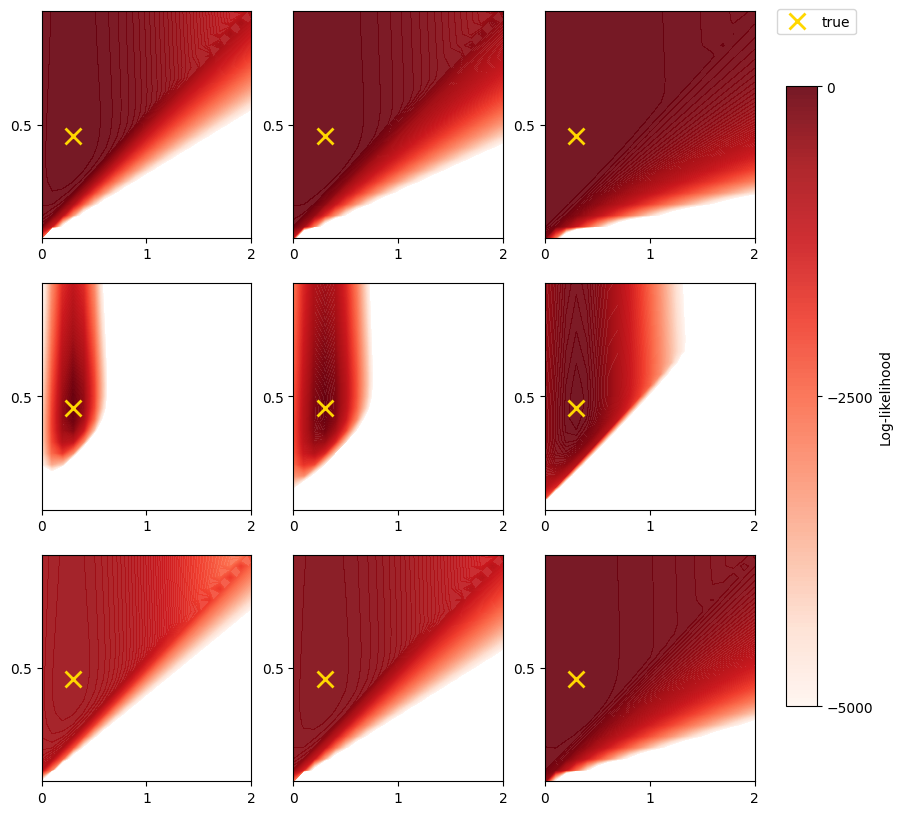

In [13]:
noise_vals = [0.0, 0.01, 0.5]
M_vals = [1000,500,100]
lower_bound = -5000
path = "C:/Users/lisah/Documents/Repos/ma-code/data/t_fixed/t100/likelihood_am/"
w0 = 0.95
m = 0.45
n0 = 1.5
a = 0.3

ll_grid_plot_am(noise_vals, M_vals, lower_bound, path, w0, n0, a, m)